ML Tutorial-02: Dimensionality Reduction and Model Evaluation with the Iris Dataset

Objective: Gain hands-on experience with PCA and LDA dimensionality reduction techniques and
evaluate their effects on machine learning model performance using the Iris dataset.

1. Data Preparation:
• Load the Iris dataset (sklearn.datasets.load_iris).
• Split into 70% training and 30% testing sets (train_test_split).
• Standardize features using StandardScaler.

2. Model Training & Evaluation (No Dimensionality Reduction): Train and evaluate the following models on the standardized dataset:
• Logistic Regression
• Decision Tree
• Random Forest
• Support Vector Machine (SVM)
Evaluation Metrics:
• Accuracy
• Precision
• Recall
• F1-Score
• Confusion Matrix

3. Dimensionality Reduction with PCA:
• Apply PCA(n_components=2) on training data.
• Transform both training and test data.
• Train the same models listed in section 2.
• Evaluate using the same metrics.

4. Dimensionality Reduction with LDA:
• Apply LinearDiscriminantAnalysis(n_components=2) on training data.
• Transform both training and test data.
• Train and evaluate the same models using the same metrics.

5. Comparison and Analysis:
• Compare model performance across three scenarios:
o Without dimensionality reduction
o With PCA
o With LDA
• Analyze the effect of dimensionality reduction on each metric.
• Provide observations and insights on model behavior and dimensionality impact.

DATA PREPARATION

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
#loading the iris dataset
iris=datasets.load_iris()

In [10]:
X=iris.data
y=iris.target

In [11]:
# Convert to pandas DataFrame to view as table
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Display first 10 rows
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
#splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(105, 4) (45, 4) (105,) (45,)


In [23]:
#standardisation of the independent features present in the data in the fixed range
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

MODEL TRAINING AND EVALUATION(NO DIMENSIONALITY REDUCTION)

In [27]:
#Train and evaluate the following models on the standardized dataset:
# Logistic Regression • Decision Tree • Random Forest • Support Vector Machine (SVM)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
#defines models
models={'Logistic Regression':LogisticRegression(max_iter=1000),
       'Decision Tree': DecisionTreeClassifier(),
       'SVM':SVC(),
       'Random Forest':RandomForestClassifier()}

In [34]:
#model training and Evaluation
for name, model in models.items():
    model.fit(X_train_std,y_train)
    y_pred=model.predict(X_test_std)
    
    print(f"\n{name}")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))


Logistic Regression
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.87        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Decision Tree
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


SVM
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
              precision    recall  f1-score   support

           0       1.00      1.

Dimensionality Reduction with PCA

In [37]:
from sklearn.decomposition import PCA

#Apply PCA n_component=2 
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

# train and evaluate model on pca data
for name, model in models.items():
    model.fit(X_train_pca,y_train)
    y_pred=model.predict(X_test_pca)
    print(f"\n{name}")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    


Logistic Regression
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


Decision Tree
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.87        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


SVM
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
              precision    recall  f1-score   support

           0       1.00      1.

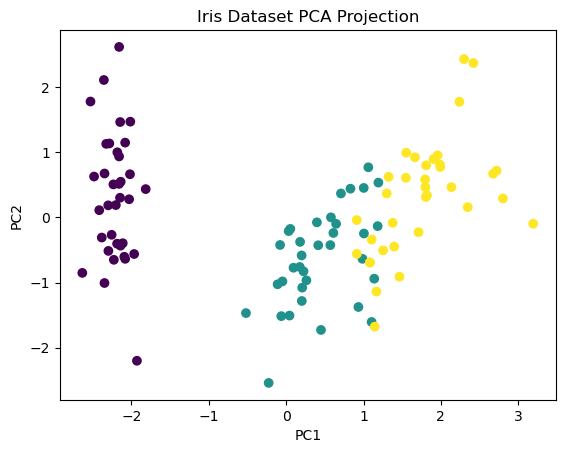

In [42]:
import matplotlib.pyplot as plt

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris Dataset PCA Projection')
plt.show()


DIMENSIONALITY REDUCTION WTIH LDA

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply LDA (2 components)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

# Train and evaluate models on LDA data
for name, model in models.items():
    model.fit(X_train_lda, y_train)
    y_pred = model.predict(X_test_lda)
    print(f"\n{name} (with LDA)")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Logistic Regression (with LDA)
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Decision Tree (with LDA)
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


SVM (with LDA)
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

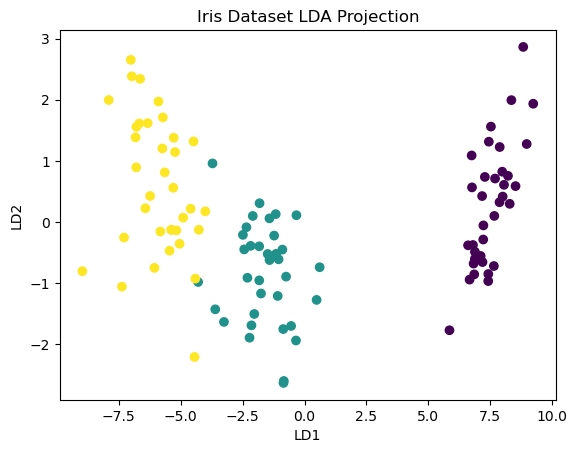

In [44]:
plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train, cmap='viridis')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Iris Dataset LDA Projection')
plt.show()


You can visually compare the printed precision, recall, F1 scores, and confusion matrices:

See how accuracy changes with/without dimensionality reduction.

Check whether PCA or LDA improves classification for any model.

Note any major drops or improvements in specific metrics.